# Taller 1

# Machine Learning - Aprendizaje Supervisado

Esta primera parte puede encontrarla en el Notebook **2. Visualizacion de Datos.**

In [1]:
# Cargue el dataset de olivetti_faces
# https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_olivetti_faces.html#sklearn.datasets.fetch_olivetti_faces

from sklearn.datasets import fetch_olivetti_faces

# Instancia el dataset en una variable

olivetti = fetch_olivetti_faces()

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\aleja\scikit_learn_data


In [2]:
# Examine el dataset, revice los datos principales que contiene - método keys

olivetti.keys()

dict_keys(['data', 'images', 'target', 'DESCR'])

In [3]:
# Que dimensiones tiene el dataset?

n_muestras, n_caracteristicas = olivetti.data.shape
print('Número de muestras: ', n_muestras)
print('Número de características: ', n_caracteristicas)

Número de muestras:  400
Número de características:  4096


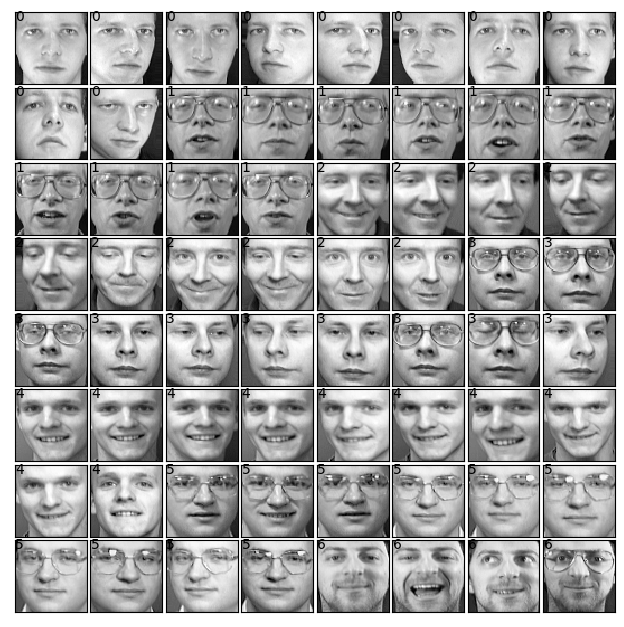

In [6]:
# Visualice las primeras 64 imagenes del dataset y sus etiquetas

%matplotlib inline
import matplotlib.pyplot as plt

# Configurar la figura
fig = plt.figure(figsize=(6, 6))  # tamaño en pulgadas
fig.subplots_adjust(left=0, right=1, bottom=0, top=1, hspace=0.05, wspace=0.05)

# mostrar algunos dígitos: cada imagen es de 8x8
for i in range(64):
    ax = fig.add_subplot(8, 8, i + 1, xticks=[], yticks=[])
    ax.imshow(olivetti.images[i], cmap=plt.cm.gray, interpolation='nearest')
    
    # Etiquetar la imagen con el valor objetivo
    ax.text(0, 7, str(olivetti.target[i]))

In [7]:
# Examine las etiquetas - que representan? 
# olivetti.DESCR

olivetti.target

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  2,  2,  2,  2,  2,  2,  2,  2,  2,  2,  3,  3,  3,  3,
        3,  3,  3,  3,  3,  3,  4,  4,  4,  4,  4,  4,  4,  4,  4,  4,  5,
        5,  5,  5,  5,  5,  5,  5,  5,  5,  6,  6,  6,  6,  6,  6,  6,  6,
        6,  6,  7,  7,  7,  7,  7,  7,  7,  7,  7,  7,  8,  8,  8,  8,  8,
        8,  8,  8,  8,  8,  9,  9,  9,  9,  9,  9,  9,  9,  9,  9, 10, 10,
       10, 10, 10, 10, 10, 10, 10, 10, 11, 11, 11, 11, 11, 11, 11, 11, 11,
       11, 12, 12, 12, 12, 12, 12, 12, 12, 12, 12, 13, 13, 13, 13, 13, 13,
       13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14, 14, 15, 15, 15,
       15, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16,
       17, 17, 17, 17, 17, 17, 17, 17, 17, 17, 18, 18, 18, 18, 18, 18, 18,
       18, 18, 18, 19, 19, 19, 19, 19, 19, 19, 19, 19, 19, 20, 20, 20, 20,
       20, 20, 20, 20, 20, 20, 21, 21, 21, 21, 21, 21, 21, 21, 21, 21, 22,
       22, 22, 22, 22, 22

In [9]:
# Examine como esta distribuido cada una de las etiquetas

import numpy as np

print(np.bincount(olivetti.target))

[10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10
 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10 10]


In [13]:
# Compruebe que el contenido de data e images es lo mismo
# Recuerde que se deben vectorizar las imagenes para ingresarlas al estimador

images = olivetti.images.reshape((400, 4096)) # Test whether all array elements along a given axis evaluate to True.
print(np.all(images == olivetti.data))

True


Para esta parte apoyese en el Notebook **3. Datasets de Entrenamiento y Test**

In [14]:
# cargue la matriz de características en X y las etiquetas en y

X, y = olivetti.data, olivetti.target

In [15]:
# Divida los datos de entrenamiento en los conjuntos de Train y Test
# 25 % para test
# 75 $ para train
# Baraje antes de dividir

from sklearn.model_selection import train_test_split

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.75, test_size=0.25, 
                                                    random_state=123)

In [16]:
# Examine el subconjunto de etiquetes y observe como se ha distribuido las diferentes clases

print("\nEtiquetas para Train y Test\n")
print(train_y)
print()
print(test_y)


Etiquetas para Train y Test

[17 29 14 14  1 37 34  5  3 29  2 12 16 14 37  9 26 18 28 18 17 10  0 28
 27  1  2  7 35 13 19 36  7  9 27 38  3 12  7  5  2 32 28 30  9 31 35 39
 33 39 17  0 15 36 18 14 38 15  8 11 15 24 20 30 10  6 10 12  8 39 24  4
 16 31  8 31 37 35 24 29 16 16 38  0 28 11 31 22 36 13 34 26 23 14 27 22
 22  4  3  3 33  2 20 38 22  1  6  2 20 38 12 21 16 19 13 29 22 11  6 13
 10 30 31 32 39 23  8 32 30 26 11 33 32 32 15 18 36 12 29 13 13 20  9 33
 31 19  6 20 38 33 18 17 21 35 16 18  4 34 13  5  9 19 21 23 28 39 34  6
 28 16 24 25 25 26 35 39 15 35  4 30 37  6 20  0  7  5 25 11 14  8 36 25
  6 25 34  4  8 10 13  1 19 36 11 29  2 14 19  1  8 26 26 22 24 25 31 10
 14 13  6  0  5 30 23  5  0  1 26 37 31  2 18 18  4 12 24 25 27 37 15  7
 36 15 37 27 14 20 27 31 33  6 32 39 16  7 29 35 11 21 35 35 18 34  9 36
 13 17 38  8 39  3 34  0 31 30  6 20 38 25 33 33 11 22  3  7  4 12 11  9
 22 21  5 12 10  8  1 23  9 32 38 36]

[23  4 30 15 34 30  5 28 37  9 17 21 21  3 18 34 19 16 

In [18]:
# Debido a que es dificil de observar la distribucion de etiquetas,
# cuente el numero de muestras por clase con bincount

print(f'Todos: {np.bincount(y) / float(len(y)) * 100.0}\n' )
print(f'Entrenamiento: {np.bincount(train_y) / float(len(train_y)) * 100.0}\n')
print(f'Test: {np.bincount(test_y) / float(len(test_y)) * 100.0}\n')

Todos: [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5
 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5
 2.5 2.5 2.5 2.5]

Entrenamiento: [2.33333333 2.33333333 2.33333333 2.         2.33333333 2.33333333
 3.33333333 2.33333333 3.         2.66666667 2.33333333 3.
 2.66666667 3.33333333 3.         2.33333333 2.66666667 1.66666667
 3.         2.         2.66666667 1.66666667 2.66666667 1.66666667
 2.         2.66666667 2.33333333 2.         2.         2.33333333
 2.33333333 3.33333333 2.33333333 2.66666667 2.33333333 3.
 3.         2.33333333 3.         2.66666667]

Test: [3. 3. 3. 4. 3. 3. 0. 3. 1. 2. 3. 1. 2. 0. 1. 3. 2. 5. 1. 4. 2. 5. 2. 5.
 4. 2. 3. 4. 4. 3. 3. 0. 3. 2. 3. 1. 1. 3. 1. 2.]



In [20]:
# Observe que en el paso anterior la distribucion de muestras de entrenamiento por clase
# no se encuentra bien balanceada, por tanto utilice la particion estratificada para ello
# y observe nuevamente la distribucion con bincount

train_X, test_X, train_y, test_y = train_test_split(X, y, 
                                                    train_size=0.75, 
                                                    test_size=0.25, 
                                                    random_state=123, 
                                                    stratify=y)

print(f'Todos: {np.bincount(y) / float(len(y)) * 100.0}\n' )
print(f'Entrenamiento: {np.bincount(train_y) / float(len(train_y)) * 100.0}\n')
print(f'Test: {np.bincount(test_y) / float(len(test_y)) * 100.0}\n')

Todos: [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5
 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5
 2.5 2.5 2.5 2.5]

Entrenamiento: [2.33333333 2.66666667 2.33333333 2.66666667 2.33333333 2.66666667
 2.66666667 2.66666667 2.66666667 2.33333333 2.66666667 2.66666667
 2.66666667 2.66666667 2.33333333 2.33333333 2.66666667 2.33333333
 2.66666667 2.33333333 2.66666667 2.66666667 2.33333333 2.66666667
 2.66666667 2.33333333 2.33333333 2.33333333 2.33333333 2.33333333
 2.33333333 2.66666667 2.33333333 2.33333333 2.33333333 2.33333333
 2.33333333 2.66666667 2.66666667 2.66666667]

Test: [3. 2. 3. 2. 3. 2. 2. 2. 2. 3. 2. 2. 2. 2. 3. 3. 2. 3. 2. 3. 2. 2. 3. 2.
 2. 3. 3. 3. 3. 3. 3. 2. 3. 3. 3. 3. 3. 2. 2. 2.]



Apoyese con el Notebook **4. Aprendizaje Supervisado 1**

In [21]:
# Utilice el estimador que crea sea mas conveniente para esta clasificación.
# LogisticRegression
# KNeighborsClassifier
# Use los valores por defecto de los hiperparametros

from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()

In [23]:
# Entrene el estimador con los datos de Train

knn.fit(train_X, train_y);

In [25]:
# Realice una estimación con los datos de Test
pred_y = knn.predict(test_X)

In [26]:
# Compare los resultados de la prediccion con las etiquetas esperadas
# En el Notebook 3  puede encontrar el codigo con numpy.where para 
# realizar la verificación

print('Ejemplos correctamente clasificados:')
correct_idx = np.where(pred_y == test_y)[0]
print(correct_idx)

print('\nEjemplos incorrectamente clasificados:')
incorrect_idx = np.where(pred_y != test_y)[0]
print(incorrect_idx)

Ejemplos correctamente clasificados:
[ 0  1  2  5  6  7  9 10 11 12 15 17 18 19 20 21 22 23 24 25 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 55
 56 58 59 60 61 62 63 65 66 67 68 69 71 72 73 74 75 76 77 78 79 80 81 82
 84 85 86 87 88 89 90 91 92 93 94 97 99]

Ejemplos incorrectamente clasificados:
[ 3  4  8 13 14 16 26 53 57 64 70 83 95 96 98]


In [27]:
# Obtenga el score del clasificador entrenado con los datos de Test

knn.score(test_X, test_y)

0.85

Apoyese en el Notebook **9. Validacion Cruzada**.

In [29]:
# Como se menciono antes, este valor se considera una estimación inocente por lo cual
# se debe usar una validación cruzada para evaluar el modelo con diferentes configuraciones
# de datos. Entrene nuevamente el modelo utilizando este metodo y obsrve los cambios que se 
# se presentan en las estimaciones. Trabaje con los hiperparametros por defecto.

from sklearn.model_selection import cross_val_score

scores = cross_val_score(knn, X, y)

print(scores)
print(np.mean(scores))

[0.85   0.85   0.8625 0.875  0.8125]
0.85


In [30]:
# La validacion cruzada utiliza el parametro cv y su valor por defecto es 5. Cual es el 
# otro valor usado normalmente? obtenga las pountajes con este valor.

scores = cross_val_score(knn, X, y, cv=10)
print(scores)
print(np.mean(scores))

[0.9   0.9   0.875 0.875 0.9   0.825 0.85  0.925 0.85  0.85 ]
0.875


In [32]:
# Observe los resultados anteriores. Que puede decir de estos valores?
# puede que en diferentes circunstancias se obtuviera un modelo con 
# un porcentaje de clasificacion del 82.5% mientras que para otra configuracion
# se puede obtener un 92.5%.

# Por defecto, la validacion cruzada usa StratifiedKFold, use KFold y ShuffleSplit.
# Se obtuvieron mejores scores?

from sklearn.model_selection import KFold, StratifiedKFold, ShuffleSplit


In [46]:
# ShuffleSplit
crossVal = ShuffleSplit(n_splits=10, test_size=.25)
scores = cross_val_score(knn, X, y, cv=crossVal)
print(scores)
print(np.mean(scores))

[0.75 0.8  0.73 0.74 0.79 0.78 0.79 0.76 0.72 0.83]
0.769


In [47]:
# KFold
crossVal = KFold(n_splits=10)
scores = cross_val_score(knn, X, y, cv=crossVal)
print(scores)
print(np.mean(scores))

[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
0.0


In [44]:
# Por qué se obtienen estos valores?
# Recuerde que que en KFold se toman los valores como se presentan en el dataset.
# Este dataset se esta ordenado, por los tanto se entreno con etiquetas que no estan en el 
# conjunto de test, por lo cual las predicciones son nulas.

In [49]:
# Baraje usando KFold
# Observe los resultados - Que se puede decir ahora?

crossVal = KFold(n_splits=10, shuffle=True)
scores = cross_val_score(knn, X, y, cv=crossVal)
print(scores)
print(np.mean(scores))

[0.85  0.925 0.775 0.75  0.85  0.875 0.7   0.85  0.85  0.85 ]
0.8274999999999999


In [50]:
# De las pruebas anteriores, cual cree que es mejor, por qué?

La siguiente sección ajustará el modelo y tratará de llegar al punto ideal de entrenamiento.
Nos apoyaremos en el Notebook **10. Seleccion de Parametros**.

In [57]:
# Hasta el momento se ha trabajado con los hiperparametros por defecto de los estimadores.
# Ahora, se cambiaran los valores con el fin de ajustar el modelo para incrementar 
# su capacidad de generalizacion.

# Utilice KNeighborsClassifier y su hiperparametro n_neighbors
# Grafique la curva de validacion para el estimador con los datos de nuestro dataset

from sklearn.model_selection import validation_curve

cv = StratifiedKFold(n_splits=10)

n_neighbors = [1, 3, 5, 10]
train_scores, test_scores = validation_curve(KNeighborsClassifier(), X, y, 
                                             param_name="n_neighbors", 
                                             param_range=n_neighbors, 
                                             cv=cv)

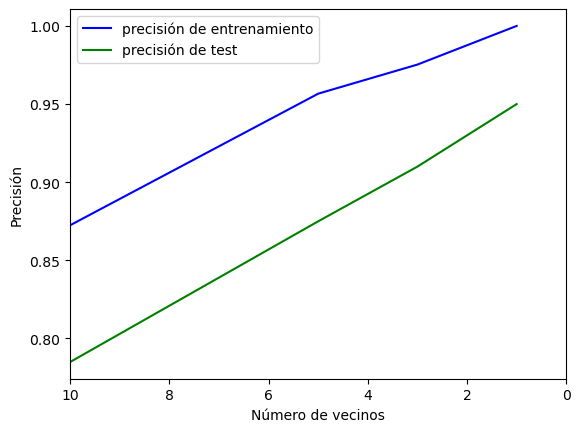

In [59]:
plt.plot(n_neighbors, train_scores.mean(axis=1), 'b', label="precisión de entrenamiento")
plt.plot(n_neighbors, test_scores.mean(axis=1), 'g', label="precisión de test")
plt.ylabel('Precisión')
plt.xlabel('Número de vecinos')
plt.xlim([10, 0])
plt.legend(loc="best");

In [ ]:
# Observe que nuestro estimador no es el mejor para nuestro problema.

In [64]:
# Probemos un nuevo clasificador
# RandomForestClassifier
# Hiperparametros
#       max_depth

from sklearn.ensemble import RandomForestClassifier

cv = StratifiedKFold(n_splits=10)

max_depth = [1, 3, 5, 10]

train_scores, test_scores = validation_curve(RandomForestClassifier(), X, y, 
                                             param_name="max_depth", 
                                             param_range=max_depth, 
                                             cv=cv)

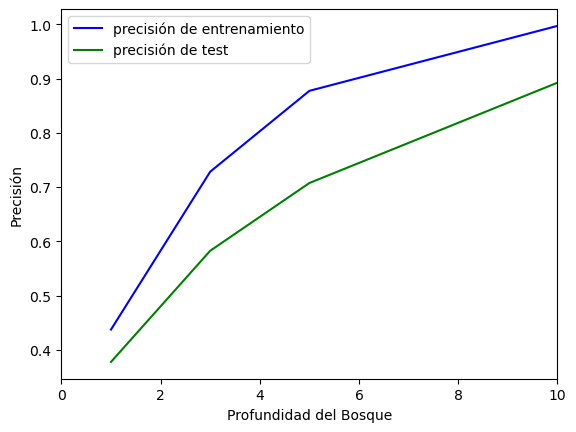

In [63]:
plt.plot(max_depth, train_scores.mean(axis=1), 'b', label="precisión de entrenamiento")
plt.plot(max_depth, test_scores.mean(axis=1), 'g', label="precisión de test")
plt.ylabel('Precisión')
plt.xlabel('Profundidad del Bosque')
plt.xlim([0, 10])
plt.legend(loc="best");

In [65]:
# Recuerde que para buscar la mejor configuracion de hiperparametros
# podemos hacer una buusquedad con GridSearchCV

# Busque los mejores hiperparametros para 
# RandomForestClassifier
# Hiperparametros
#       max_depth
#       n_estimators=10

from sklearn.model_selection import GridSearchCV

cv = StratifiedKFold(n_splits=5)


param_grid = {'max_depth': [10, 15, 20], 'n_estimators': [5, 10, 25]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv, verbose=3)

In [66]:
grid.fit(X, y)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV 1/5] END ......max_depth=10, n_estimators=5;, score=0.512 total time=   0.0s
[CV 2/5] END ......max_depth=10, n_estimators=5;, score=0.562 total time=   0.0s
[CV 3/5] END ......max_depth=10, n_estimators=5;, score=0.500 total time=   0.0s
[CV 4/5] END ......max_depth=10, n_estimators=5;, score=0.537 total time=   0.0s
[CV 5/5] END ......max_depth=10, n_estimators=5;, score=0.500 total time=   0.0s
[CV 1/5] END .....max_depth=10, n_estimators=10;, score=0.637 total time=   0.1s
[CV 2/5] END .....max_depth=10, n_estimators=10;, score=0.650 total time=   0.1s
[CV 3/5] END .....max_depth=10, n_estimators=10;, score=0.650 total time=   0.1s
[CV 4/5] END .....max_depth=10, n_estimators=10;, score=0.662 total time=   0.1s
[CV 5/5] END .....max_depth=10, n_estimators=10;, score=0.537 total time=   0.0s
[CV 1/5] END .....max_depth=10, n_estimators=25;, score=0.725 total time=   0.4s
[CV 2/5] END .....max_depth=10, n_estimators=25;,

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=RandomForestClassifier(),
             param_grid={'max_depth': [10, 15, 20],
                         'n_estimators': [5, 10, 25]},
             verbose=3)

In [67]:
# Evalue el modelo que se genero con GridSearchCV
# Por que se obtienen estos resultados?

grid.score(X, y)

1.0

In [68]:
# Muestre el mejor score

grid.best_score_

0.89

In [69]:
# Con que parametros se obtuvo el mejor score?
grid.best_params_

{'max_depth': 20, 'n_estimators': 25}

In [81]:
# Constuya el modelo nuevamente con el mejor estimador que considere
# pero ahora divida el dataset en Train, Validation y Test

from sklearn.model_selection import train_test_split, ShuffleSplit

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

cv = ShuffleSplit(n_splits=10, test_size=.25)


param_grid = {'max_depth': [10, 15, 20], 'n_estimators': [5, 10, 25]}
grid = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=cv, verbose=3)
grid.fit(X_train, y_train)
grid.score(X_test, y_test)

Fitting 10 folds for each of 9 candidates, totalling 90 fits
[CV 1/10] END .....max_depth=10, n_estimators=5;, score=0.293 total time=   0.0s
[CV 2/10] END .....max_depth=10, n_estimators=5;, score=0.360 total time=   0.0s
[CV 3/10] END .....max_depth=10, n_estimators=5;, score=0.307 total time=   0.0s
[CV 4/10] END .....max_depth=10, n_estimators=5;, score=0.413 total time=   0.0s
[CV 5/10] END .....max_depth=10, n_estimators=5;, score=0.213 total time=   0.0s
[CV 6/10] END .....max_depth=10, n_estimators=5;, score=0.320 total time=   0.0s
[CV 7/10] END .....max_depth=10, n_estimators=5;, score=0.227 total time=   0.0s
[CV 8/10] END .....max_depth=10, n_estimators=5;, score=0.373 total time=   0.0s
[CV 9/10] END .....max_depth=10, n_estimators=5;, score=0.360 total time=   0.0s
[CV 10/10] END ....max_depth=10, n_estimators=5;, score=0.440 total time=   0.0s
[CV 1/10] END ....max_depth=10, n_estimators=10;, score=0.507 total time=   0.1s
[CV 2/10] END ....max_depth=10, n_estimators=10;

0.83

In [82]:
# Muestre nuevamente el mejor score y los mejores parametros

print(grid.best_score_)
print(grid.best_params_)

0.7613333333333333
{'max_depth': 20, 'n_estimators': 25}


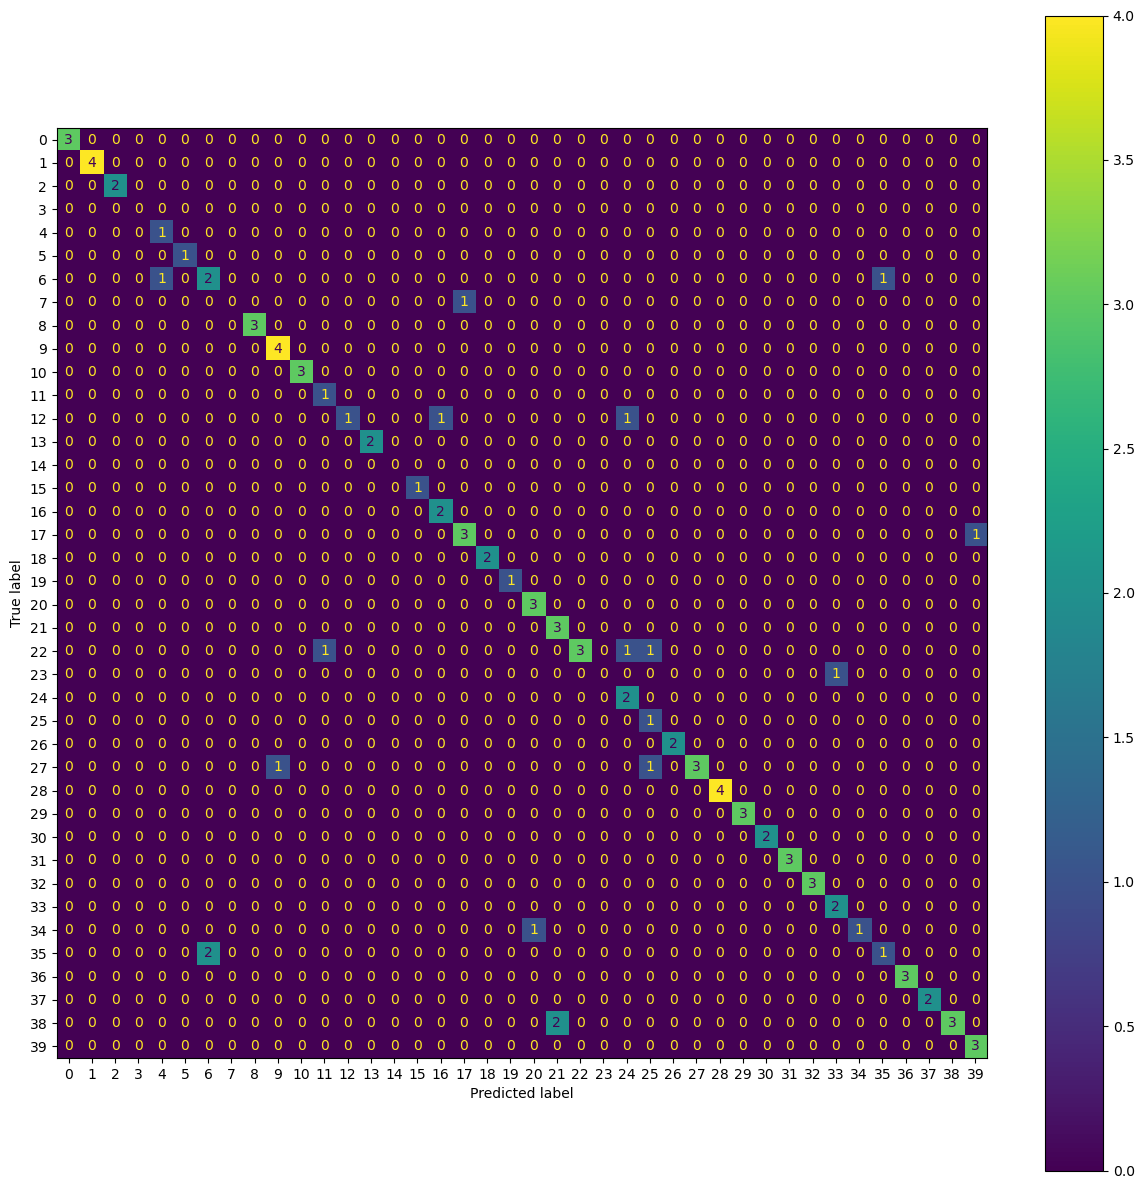

In [83]:
# Imprima la matrix de Confusion para determinar si nuestro calsificador
# tiene la misma capacidad para cada una de las clases del dataset

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay



cm = confusion_matrix(y_test, grid.predict(X_test), labels=grid.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=grid.classes_)
fig, ax = plt.subplots(figsize=(15,15))
disp.plot(ax=ax)

In [80]:
# Piensa usted que este es un buen clasificador,, segun los resultados obteneidos?
# Como podría mejorarlo?
# Realice diferentes pruebas cambiando los valores de los hiperparametros y el tipo de Fold que se aha usado,